In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import KFold as KF, cross_val_score as CVS
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from statsmodels.formula.api import ols


In [269]:
# Question 6
df = pd.read_csv("wage.csv")
df.head()

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [270]:
# 6(a)
# model variables
y = df["wage"][:,np.newaxis]
x = df["age"][:,np.newaxis]

In [271]:
scores = []
for i in range(0,11):
    model = Pipeline([('poly', PolynomialFeatures(degree = i)), ('linear', lr())])
    model.fit(x,y)
    
    score = CVS(model, x,y, cv = 5, scoring = 'neg_mean_squared_error')
    scores.append(np.mean(score))

scores = np.abs(scores) # to print absolute value i.e. avoiding -ve signs
scores

array([1741.33523001, 1675.01423805, 1599.59822685, 1594.72621626,
       1593.9141039 , 1595.43313192, 1594.92987851, 1598.92471212,
       1599.50271002, 1599.4216035 , 1599.10580864])

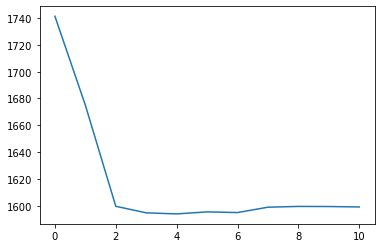

In [272]:
# plotting errors
x_plot = np.arange(0,11)
plt.plot(x_plot, scores);


In [273]:
print(np.where(scores==np.min(scores)))
# Findings: Optimal degree d for the polynomial according to cross-validation: 4                        

(array([4]),)


In [274]:
# We will use statsmodels to perform the hypothesis testing using ANOVA
# Fitting polynomial models to use in statsmodel.

models = []
for i in range(0,11):
    poly = PolynomialFeatures(degree=i)
    x_pol = poly.fit_transform(x)
    model = sm.GLS(y, x_pol).fit()
    models.append(model)

In [275]:
# Hypothesis testing using ANOVA
sm.stats.anova_lm(models[0],models[1],models[2],models[3],models[4],models[5],models[6],models[7], type = 1)
# Findings: The lower the values of F, the lower the significance of the coefficient. 
# Degrees higher than 4 don't improve the polynomial regression model significantly. 
# This results is in agreement with cross validation results.


/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2999.0,5.222086e+06,0.0,NaN,NaN,NaN
1,2998.0,5.022216e+06,1.0,199869.664970,125.553046,1.412341e-28
2,2997.0,4.793430e+06,1.0,228786.010128,143.717560,2.226663e-32
3,2996.0,4.777674e+06,1.0,15755.693664,9.897327,1.671425e-03
4,2995.0,4.771604e+06,1.0,6070.152124,3.813115,5.094581e-02
5,2994.0,4.770322e+06,1.0,1282.563017,0.805674,3.694747e-01
6,2993.0,4.766389e+06,1.0,3932.257484,2.470144,1.161330e-01
7,2993.0,4.764599e+06,-0.0,1790.520962,-inf,NaN


In [276]:
# save optimal degree
opt_degree = 4

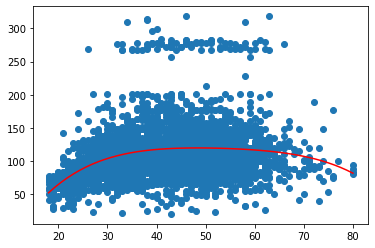

In [277]:
# Plotting polynomial regression
# Auxiliary variables X_line and y_line are created.
# These variables allow us to draw the polynomial regression.
# np.linspace() is used to create an ordered sequence of numbers. Then we can plot the polynomial regression.

model = Pipeline([('poly', PolynomialFeatures(degree = opt_degree)), ('linear', lr())])
model.fit(x,y)

x_line = np.linspace(18,80)[:,np.newaxis]
y_line = model.predict(x_line)

plt.scatter(x,y)
plt.plot(x_line,y_line, color = "red");

In [278]:
# 6(b)
# To define the step function, we need to cut the dataset into parts (pd.cut() does the job) and associate a each part to a dummy variable.
# For example, if we have two parts (age<50 and age >= 50), we will have one dummy variable that gets value 1 if age<50 and value 0 if age>50.
scores = []
for i in range(1,10):
    age_groups = pd.cut(df['age'], i)
    df_dummies = pd.get_dummies(age_groups)

    x_cv = df_dummies


    model.fit(x_cv, y)
    score = CVS(model, x_cv, y, cv = 5, scoring = 'neg_mean_squared_error')
    scores.append(score)

scores = np.abs(scores) # Scikit computes negative mean square errors, so we need to turn the values positive.

In [279]:
# No. of scores that minimize the error
min_scores = []
for i in range(0,9):
    min_score = np.mean(scores[i,:])
    min_scores.append(min_score)
    
    print("Number of cuts: %i, error %.3f"% (i+1, min_score))
    
# Findings: The number of cuts that minimize the error is 8.

Number of cuts: 1, error 1741.335
Number of cuts: 2, error 1733.550
Number of cuts: 3, error 1687.591
Number of cuts: 4, error 1634.778
Number of cuts: 5, error 1638.458
Number of cuts: 6, error 1626.215
Number of cuts: 7, error 1614.828
Number of cuts: 8, error 1612.826
Number of cuts: 9, error 1615.945


In [280]:
# The following code shows, step by step, how to plot the step function.

In [281]:
# Convert ages to groups of age ranges. 
n_groups = 8
age_groups = pd.cut(df.age, n_groups)

In [282]:
# Dummy variables
# Dummy variables is a way to deal with categorical variables in linear regressions. It associates the value 1 to the group to which the variable belongs, and the value 0 to the remaining groups.
age_dummies = pd.get_dummies(age_groups)

In [283]:
# Dataset for step function
# Add wage to the dummy dataset.
dfY = df.wage
df_step = pd.concat([dfY, age_dummies], axis = 1)
df_step.head()

,wage,"(17.938, 25.75]","(25.75, 33.5]","(33.5, 41.25]","(41.25, 49.0]","(49.0, 56.75]","(56.75, 64.5]","(64.5, 72.25]","(72.25, 80.0]"
0,75.043154,1,0,0,0,0,0,0,0
1,70.476020,1,0,0,0,0,0,0,0
2,130.982177,0,0,0,1,0,0,0,0
3,154.685293,0,0,0,1,0,0,0,0
4,75.043154,0,0,0,0,1,0,0,0


In [284]:
# variable to fit step function
# X == dummy variables; y == wage.
x_step = df_step.iloc[:,1:]
y_step = df_step.iloc[:, 0]


In [207]:
# Fit step function (statsmodels)
reg = sm.GLM(y_step[:,np.newaxis],x_step).fit()

In [216]:
# Auxiliary data to plot step function
x_aux = np.linspace(18,80)
group_aux = pd.cut(x_aux, n_groups)
aux_dummies = pd.get_dummies(group_aux)


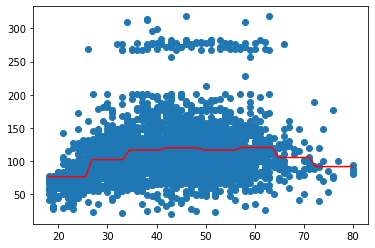

In [225]:
# Plot step function
x_step_lin = np.linspace(18,80)
y_step_lin = reg.predict(aux_dummies)

plt.scatter(x,y);
plt.plot(x_step_lin, y_step_lin, color = "red");

In [286]:
# Question 7
df.describe()

,year,age,logwage,wage
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2005.791000,42.414667,4.653905,111.703608
std,2.026167,11.542406,0.351753,41.728595
min,2003.000000,18.000000,3.000000,20.085537
25%,2004.000000,33.750000,4.447158,85.383940
50%,2006.000000,42.000000,4.653213,104.921507
75%,2008.000000,51.000000,4.857332,128.680488
max,2009.000000,80.000000,5.763128,318.342430


In [287]:
df.head()

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [288]:
df.maritl.value_counts(sort= True)


2. Married          2074
1. Never Married     648
4. Divorced          204
5. Separated          55
3. Widowed            19
Name: maritl, dtype: int64

In [289]:
df.jobclass.value_counts(sort= True)

1. Industrial     1544
2. Information    1456
Name: jobclass, dtype: int64

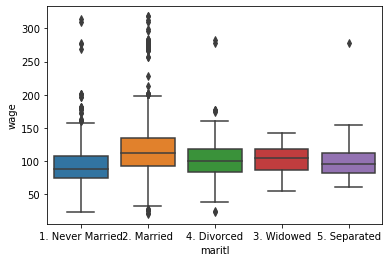

In [290]:
sns.boxplot(df.maritl, df.wage);
# Findings: Married people get higher wages.

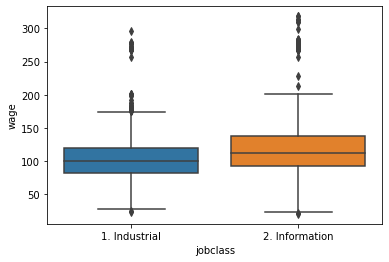

In [291]:
sns.boxplot(df.jobclass, df.wage);
# Findings: Information people get higher wages.

In [297]:
x1 = df.maritl  
x2 = df.jobclass
y1 = df.wage
df1 = pd.concat([y1,x1,x2], axis = 1)
df1.head()

,wage,maritl,jobclass
0,75.043154,0,0
1,70.476020,0,1
2,130.982177,1,0
3,154.685293,1,1
4,75.043154,3,1


In [308]:
# use R (Gam function)

In [314]:
# Question 8
df = pd.read_csv("auto.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [316]:
# We would like it to be a integer, in order to appear in scatter plots.
type(df['horsepower'][0])

str

In [317]:
# 'horsepower' is a string because one of its values is '?'
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [341]:
df['horsepower'] = df['horsepower'].replace(to_replace = '?', value = '0')
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '0', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [346]:
df['horsepower'] = df['horsepower'].astype(int)
type(df['horsepower'][0])

numpy.int64

Text(0.5, 1.0, "missing values in Auto['horsepower']")

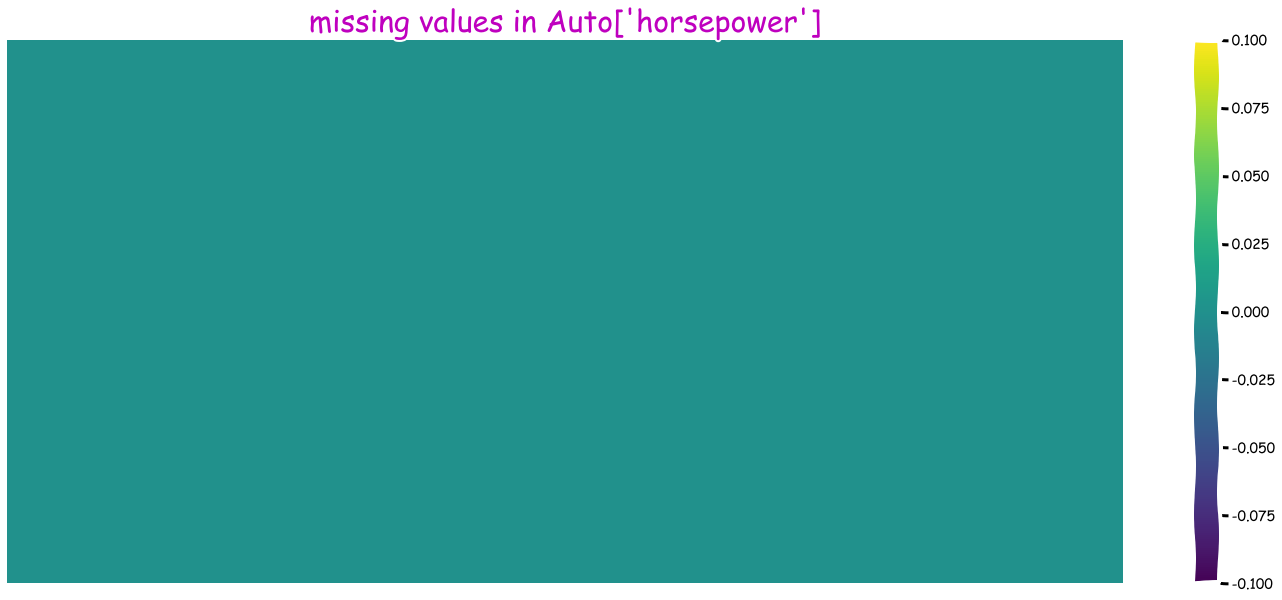

In [344]:
plt.xkcd()
plt.figure(figsize=(25, 10))
sns.heatmap(df[['horsepower']]=='?', yticklabels=False, xticklabels=False, cmap='viridis')
plt.title("missing values in Auto['horsepower']", fontsize=30, color='m')

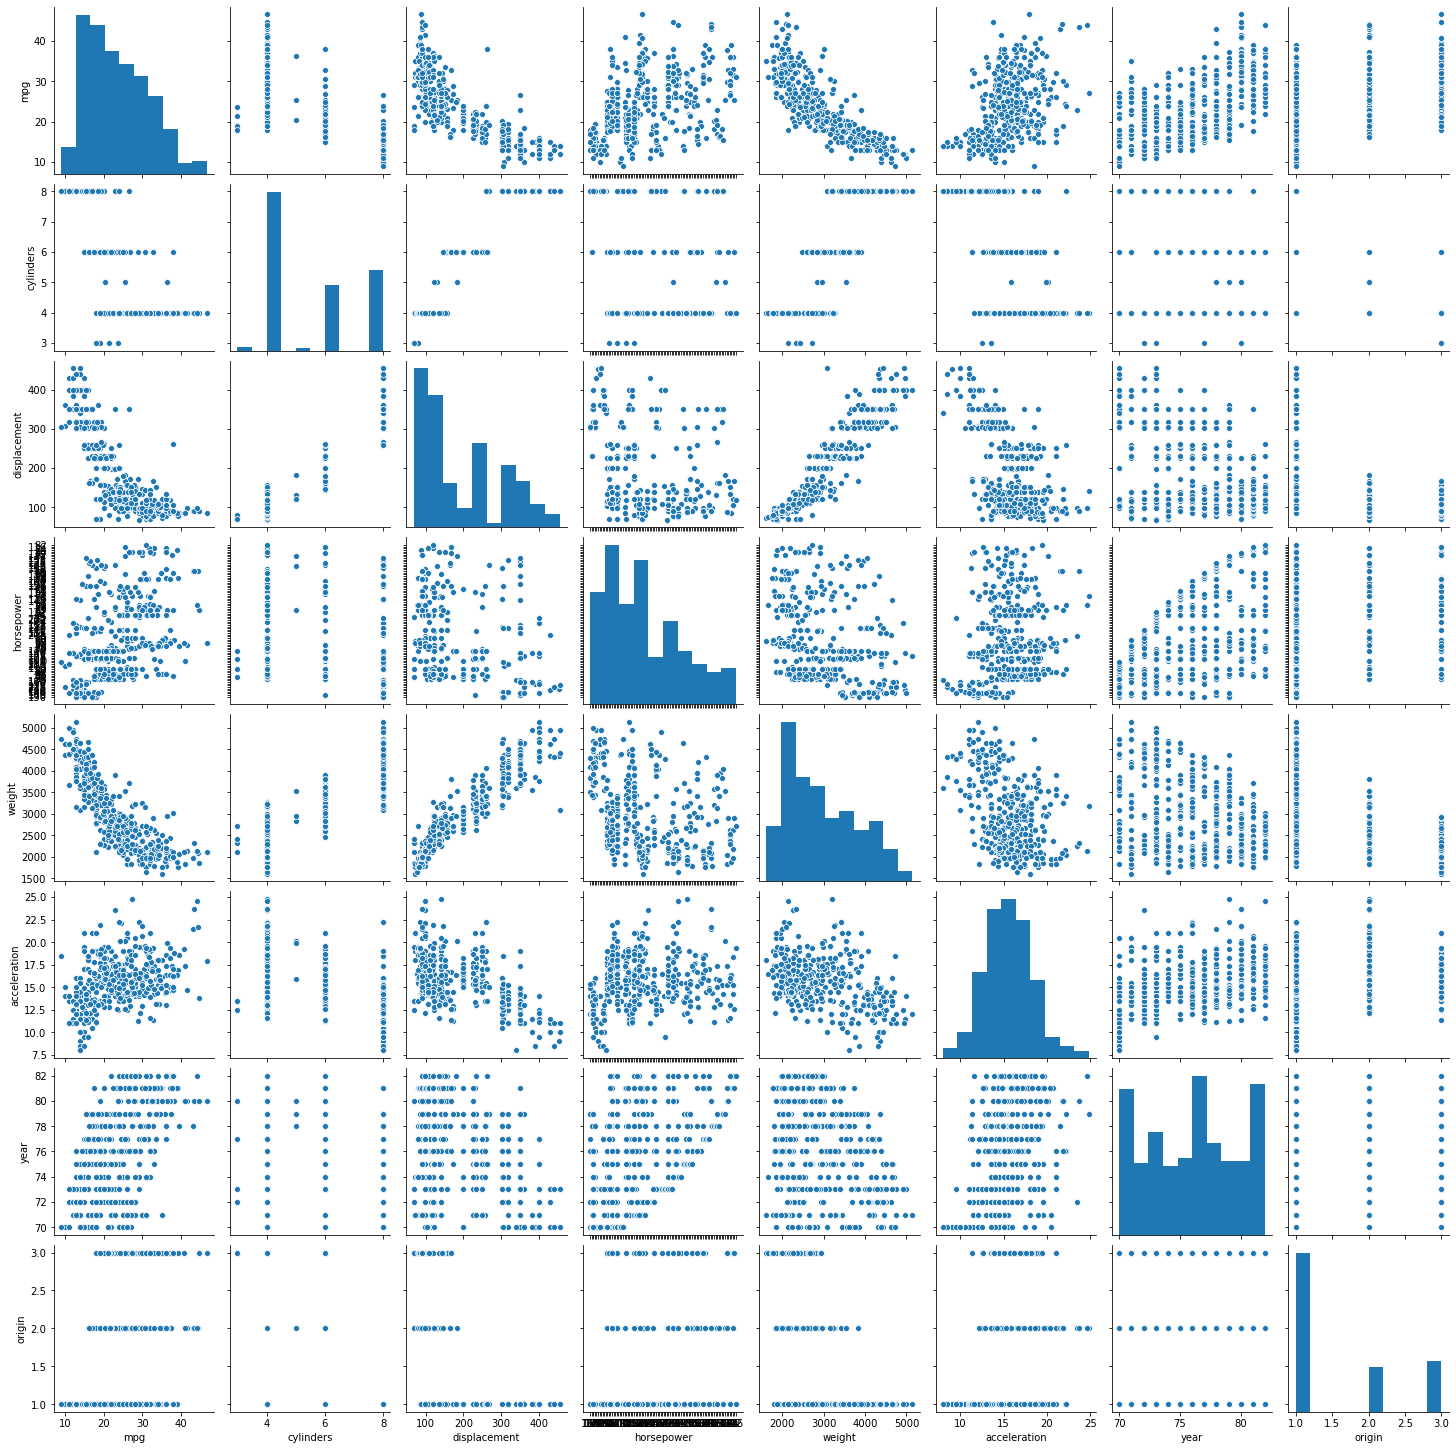

In [319]:
sns.pairplot(df);
# Findings: mpg has non=linear relatonship with displacement, horsepower, weight, acceleration.

In [1]:
# use gam in R for checking: https://rpubs.com/leechau/392778
# use cv.glm$delta in R to find MSE

In [2]:
# Question 9
from sklearn.datasets import load_boston
boston = load_boston()

In [6]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['Price'] = boston.target # the Price column is available in other attribute called target.
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
p = df.DIS
r = df.NOX


In [28]:
# 9(a) to 9(f): Use R: https://rpubs.com/leechau/392778

In [26]:
fit = smf.ols('NOX ~ np.power(DIS, 5)', df).fit()
    
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    NOX   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     70.17
Date:                Sun, 24 Jan 2021   Prob (F-statistic):           5.45e-16
Time:                        03:51:25   Log-Likelihood:                 406.04
No. Observations:                 506   AIC:                            -808.1
Df Residuals:                     504   BIC:                            -799.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.5675      0.005  

In [21]:
reg = smf.ols('NOX~ DIS + np.power(DIS,2)', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NOX   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     586.4
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          3.53e-132
Time:                        03:49:23   Log-Likelihood:                 677.54
No. Observations:                 506   AIC:                            -1349.
Df Residuals:                     503   BIC:                            -1336.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.8440      0.011     75.385      0.000       0.822       0.866
DIS                 -0.1116      0.005    -20.982      0.000      -0.122      -0.101
np.power(DIS, 2)     0.0071      0.001     13.462      0.000       0.006       0.008
==============================================================================
Omnibus:                       64.309   Durbin-Watson:                   0.284
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.097
Skew:                           0.912   Prob(JB):                     7.41e-20
Kurtosis:                       3.924   Cond. No.                         124.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
beta0 = np.zeros(n)
# Question 10: use R: https://rpubs.com/leechau/392778

In [29]:
# Question 11(a)
x1 = np.random.normal(size = 100)
x2 = np.random.normal(size = 100)
y = np.random.normal(size=100)


In [30]:
# 11(b)
B1 = 3.27

In [40]:
# 11(c) to (g): use R

In [41]:
# Question 12